In [ ]:
import os
print(os.listdir())  # Check if mlp.py is in the current directory


['.config', '.ipynb_checkpoints', 'mlp.py', '__pycache__', 'sample_data']


In [ ]:
import math
!pip install ucimlrepo
!pip install scikit-learn

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd
from mlp_autompg import LossFunction, CrossEntropy, ActivationFunction, batch_generator
from mlp_autompg import MultilayerPerceptron, Layer, Relu, Linear, SquaredError, Tanh, Sigmoid, Softmax, Mish, Softplus
from sklearn.model_selection import train_test_split


In [13]:
# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Combine features and target into one DataFrame for easy filtering
data = pd.concat([X, y], axis=1)

# Drop rows where the target variable is NaN
cleaned_data = data.dropna()

# Split the data back into features (X) and target (y)
X = cleaned_data.iloc[:, :-1]
y = cleaned_data.iloc[:, -1]

# Display the number of rows removed
rows_removed = len(data) - len(cleaned_data)
print(f"Rows removed: {rows_removed}")

print("Head of the dataset:")
print(data.head())

print("\nTail of the dataset:")
print(data.tail())

Rows removed: 6
Head of the dataset:
   displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin   mpg  
0       1  18.0  
1       1  15.0  
2       1  18.0  
3       1  16.0  
4       1  17.0  

Tail of the dataset:
     displacement  cylinders  horsepower  weight  acceleration  model_year  \
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6  

In [14]:
# Do a 70/30 split (e.g., 70% train, 30% other)
X_train, X_leftover, y_train, y_leftover = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,    # for reproducibility
    shuffle=True,       # whether to shuffle the data before splitting
)

# Split the remaining 30% into validation/testing (15%/15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_leftover, y_leftover,
    test_size=0.5,
    random_state=42,
    shuffle=True,
)

# Compute statistics for X (features)
X_mean = X_train.mean(axis=0)  # Mean of each feature
X_std = X_train.std(axis=0)    # Standard deviation of each feature

# Standardize X
X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Compute statistics for y (targets)
y_mean = y_train.mean()  # Mean of target
y_std = y_train.std()    # Standard deviation of target

# Standardize y
y_train = (y_train - y_mean) / y_std
y_val = (y_val - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

X_train.shape

print(f"Samples in Training:   {len(X_train)}")
print(f"Samples in Validation: {len(X_val)}")
print(f"Samples in Testing:    {len(X_test)}")


Samples in Training:   274
Samples in Validation: 59
Samples in Testing:    59


In [15]:
# Convert Pandas DataFrame to NumPy array before training
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_val = X_val.to_numpy()
y_val = y_val.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


In [23]:
# Define MLP Architecture
mlp = MultilayerPerceptron([
    Layer(fan_in=X_train.shape[1], fan_out=256, activation_function=Relu(), dropout_rate=0.1),
    Layer(fan_in=256, fan_out=128, activation_function=Relu(), dropout_rate=0.1),
    Layer(fan_in=128, fan_out=64, activation_function=Relu(), dropout_rate=0.05),
    Layer(fan_in=64, fan_out=32, activation_function=Relu(), dropout_rate=0.05),
    Layer(fan_in=32, fan_out=16, activation_function=Relu(), dropout_rate=0.02),
    Layer(fan_in=16, fan_out=1, activation_function=Linear())
])
# Train the Model
loss_function = SquaredError()
train_losses, val_losses = mlp.train(X_train, y_train, X_val, y_val,
                                         loss_function, learning_rate=0.0005,
                                         batch_size=64, epochs=50, rmsprop=True)


Epoch 1/50 - Training Loss: 1.0532 - Validation Loss: 0.9279
Epoch 2/50 - Training Loss: 1.2221 - Validation Loss: 1.1176
Epoch 3/50 - Training Loss: 1.3647 - Validation Loss: 1.1885
Epoch 4/50 - Training Loss: 1.6289 - Validation Loss: 1.5860
Epoch 5/50 - Training Loss: 1.5737 - Validation Loss: 1.4299
Epoch 6/50 - Training Loss: 1.9330 - Validation Loss: 1.7297
Epoch 7/50 - Training Loss: 1.8185 - Validation Loss: 1.6267
Epoch 8/50 - Training Loss: 1.8682 - Validation Loss: 1.7475
Epoch 9/50 - Training Loss: 1.7922 - Validation Loss: 1.6378
Epoch 10/50 - Training Loss: 1.9881 - Validation Loss: 1.7616
Epoch 11/50 - Training Loss: 1.7649 - Validation Loss: 1.5966
Epoch 12/50 - Training Loss: 1.8326 - Validation Loss: 1.5586
Epoch 13/50 - Training Loss: 1.8314 - Validation Loss: 1.6975
Epoch 14/50 - Training Loss: 1.7676 - Validation Loss: 1.4835
Epoch 15/50 - Training Loss: 1.9763 - Validation Loss: 1.8060
Epoch 16/50 - Training Loss: 1.8773 - Validation Loss: 1.6832
Epoch 17/50 - Tra


🔹 Total Test Loss: 1.8780


🔹 True MPG vs Predicted MPG:

True MPG | Predicted MPG
------------------------------
-0.45 | -0.54
-0.95 | -0.87
0.42 | 0.32
-1.33 | -1.64
-0.33 | -0.20
-0.53 | -0.96
-1.08 | -1.62
-1.08 | -1.80
-0.17 | 0.02
-0.70 | 0.24


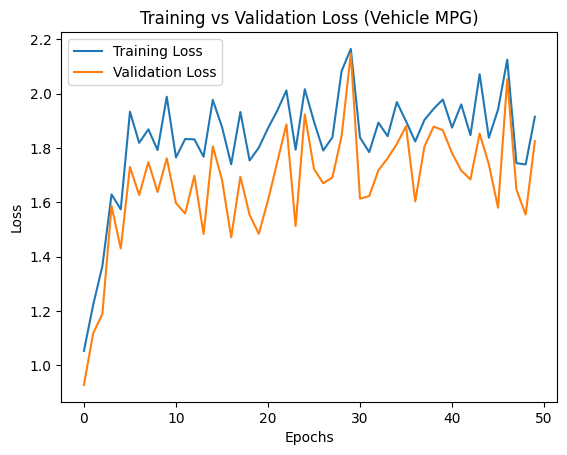

In [24]:
# Evaluate Model on Test Data
y_pred = mlp.forward(X_test)
test_loss = loss_func.loss(y_test, y_pred)
print(f"\n🔹 Total Test Loss: {test_loss:.4f}\n")

# Print True vs Predicted MPG for First 10 Samples
comparison = np.hstack((y_test.reshape(-1,1), y_pred.reshape(-1,1)))
print("\n🔹 True MPG vs Predicted MPG:\n")
print("True MPG | Predicted MPG")
print("-" * 30)
for i in range(10):
    print(f"{comparison[i, 0]:.2f} | {comparison[i, 1]:.2f}")

# Plot Training vs Validation Loss
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss (Vehicle MPG)")
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32, 16),  # Hidden layers
                             activation='relu',   # ReLU activation function
                             solver='adam',       # Adam optimizer
                             alpha=0.0001,        # L2 regularization (prevents overfitting)
                             batch_size=128,      # Mini-batch size
                             learning_rate_init=0.0003,  # Initial learning rate
                             max_iter=500,        # Maximum training iterations
                             random_state=42,     # For reproducibility
                             early_stopping=True, # Stops training if validation loss increases
                             validation_fraction=0.2)  # 20% of training data for validation

# Train the model
mlp_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = mlp_regressor.predict(X_test)

# Compute Test Loss (MSE)
test_loss = mean_squared_error(y_test, y_pred)
print(f"\n🔹 Total Test Loss (MSE): {test_loss:.4f}\n")

# Display True vs Predicted Values for First 10 Samples
print("\n🔹 True MPG vs Predicted MPG:\n")
print("True MPG | Predicted MPG")
print("-" * 30)
for true, pred in zip(y_test[:10], y_pred[:10]):
    print(f"{true:.2f}     | {pred:.2f}")




🔹 Total Test Loss (MSE): 0.1045


🔹 True MPG vs Predicted MPG:

True MPG | Predicted MPG
------------------------------
-0.45     | -0.74
-0.95     | -0.78
0.42     | 0.45
-1.33     | -1.44
-0.33     | -0.40
-0.53     | -0.81
-1.08     | -1.39
-1.08     | -1.23
-0.17     | 0.10
-0.70     | 0.13
